# Import Data & Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [36]:
df.drop('CustomerID', axis=1, inplace=True)

<AxesSubplot:>

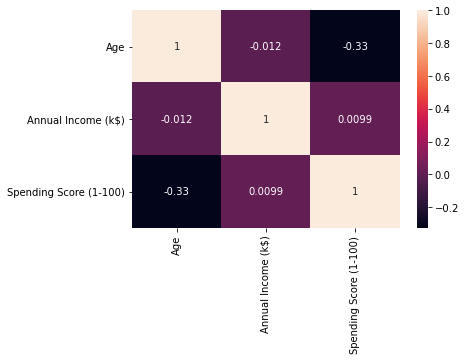

In [37]:
sns.heatmap(df.corr(), annot=True)

In [38]:
# rename
df.rename(columns={'Spending Score (1-100)': 'Score', 'Annual Income (k$)': 'Income'}, inplace=True)
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [41]:
# df.to_csv('newKmeanCluster.csv')

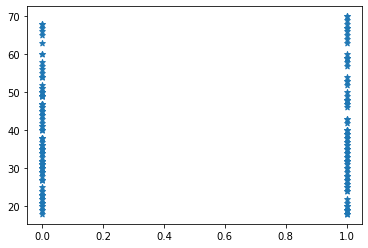

In [42]:
# Visualization

plt.scatter(df['Gender'], df['Age'], marker='*')

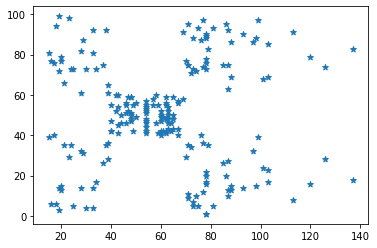

In [43]:
plt.scatter(df['Income'], df['Score'], marker='*') 

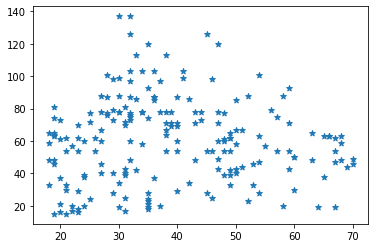

In [44]:
plt.scatter(df['Age'], df['Income'], marker='*')

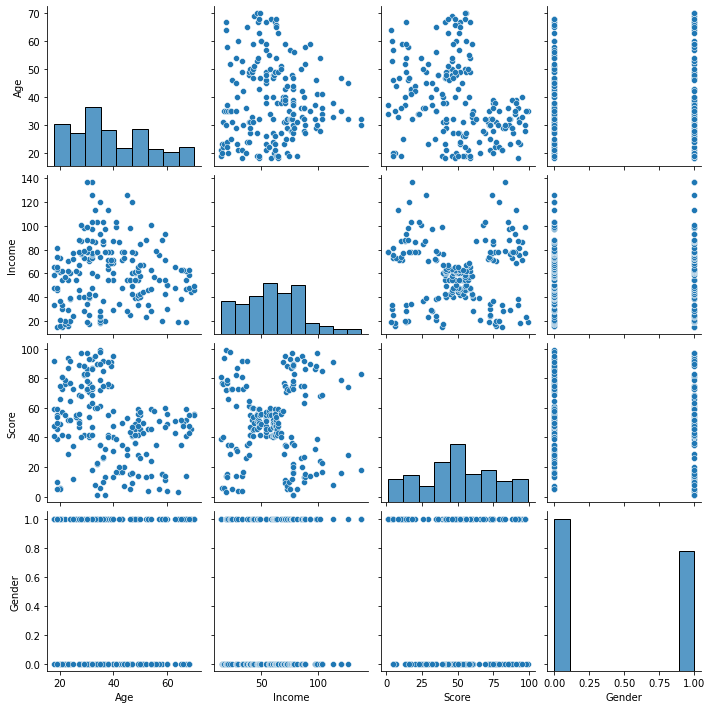

In [45]:
# Pairplot
sns.pairplot(df[['Age', 'Income', 'Score', 'Gender']])

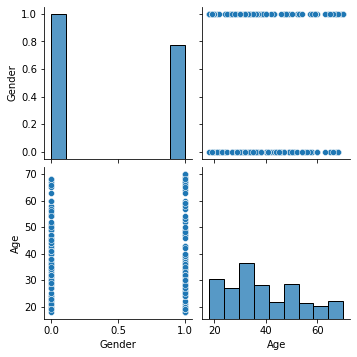

In [46]:
sns.pairplot(df[['Gender','Age']])

# Optimum Number of Clusters

In [47]:
from sklearn.cluster import KMeans
wcss = []
cluster_range = range(1, 16)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k) # default = 8
    kmeans.fit(df[['Gender', 'Age']])
    wcss.append(kmeans.inertia_) # How well a dataset is clusterd by K-Means

In [48]:
wcss

[38880.78000000002,
 10598.908319185066,
 5717.7293233082755,
 2563.3720238095234,
 1670.349558929808,
 1071.6046862681005,
 822.0309736709892,
 638.2772893448196,
 524.6834116930042,
 427.17537380859716,
 335.35679678157624,
 289.45279185976943,
 254.11735838536035,
 223.77154137572097,
 205.87891201935315]

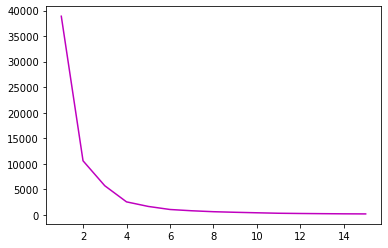

In [49]:
plt.plot(cluster_range, wcss, color='m')

In [50]:
!pip install kneed # for plotting 5

In [51]:
from kneed import KneeLocator
kn = KneeLocator(cluster_range, wcss, curve='convex', direction = 'decreasing')

print('Optimum number of cluster: ',kn.knee)

Optimum number of cluster:  4


# After Tuning

In [52]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=4)

df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [53]:
kmeans.fit_predict(df[['Gender', 'Age']]) # fit & predict

array([0, 0, 0, 0, 3, 0, 3, 0, 1, 3, 1, 3, 1, 0, 3, 0, 3, 0, 2, 3, 3, 0,
       2, 3, 2, 3, 2, 3, 3, 0, 1, 0, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0, 2, 3,
       2, 0, 2, 0, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 3, 1, 2, 1, 1, 1, 0, 2, 3, 0, 2, 1, 3, 1, 2, 0, 2, 2, 0,
       3, 2, 1, 0, 2, 3, 3, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 2, 2, 2, 0, 3, 3, 3, 0, 3, 2, 3, 1, 3, 2, 3,
       0, 3, 0, 3, 2, 3, 0, 3, 1, 3, 0, 3, 0, 0, 2, 3, 3, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 3, 1, 3, 0, 3, 2, 3, 2, 3, 3, 3, 3, 0, 3, 3, 2, 3,
       1, 0, 1, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3], dtype=int32)

In [54]:
kmeans.cluster_centers_

array([[ 0.5       , 22.6       ],
       [ 0.62068966, 63.27586207],
       [ 0.36170213, 48.34042553],
       [ 0.37837838, 34.22972973]])

In [55]:
df['clusters'] = kmeans.predict(df[['Gender', 'Age']])
df.head()

,Gender,Age,Income,Score,clusters
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,3


# Visualization

In [56]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1] 
df2 = df[df.clusters == 2]
df3 = df[df.clusters == 3]

In [57]:
df.shape

(200, 5)

In [58]:
df0.shape

(50, 5)

In [59]:
df1.shape

(29, 5)

In [60]:
df2.shape

(47, 5)

In [61]:
df3.shape

(74, 5)

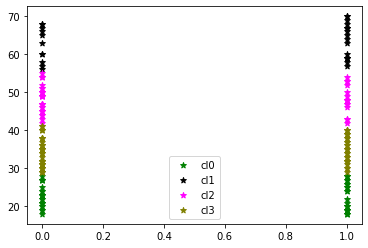

In [62]:
plt.scatter(df0['Gender'], df0['Age'], color='green', label='cl0', marker='*')
plt.scatter(df1['Gender'], df1['Age'], color='black', label='cl1', marker='*')
plt.scatter(df2['Gender'], df2['Age'], color='magenta', label='cl2', marker='*')
plt.scatter(df3['Gender'], df3['Age'], color='olive', label='cl3', marker='*')


plt.legend()

In [63]:
centers = kmeans.cluster_centers_ # centroid
centers

array([[ 0.5       , 22.6       ],
       [ 0.62068966, 63.27586207],
       [ 0.36170213, 48.34042553],
       [ 0.37837838, 34.22972973]])

# Four Clusters & Their Red Centroids

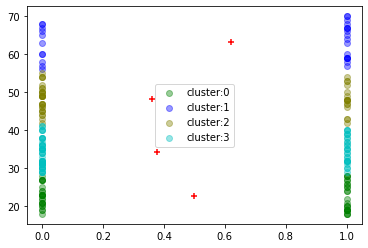

In [65]:
plt.scatter(df0['Gender'], df0['Age'], color='g', label='cluster:0', alpha=.4)
plt.scatter(df1['Gender'], df1['Age'], color='b', label='cluster:1', alpha=.4)
plt.scatter(df2['Gender'], df2['Age'], color='olive', label='cluster:2', alpha=.4)
plt.scatter(df3['Gender'], df3['Age'], color='c', label='cluster:3', alpha=.4)


plt.scatter(centers[:,0], centers[:,1], color='r', marker='+' )

plt.legend()